# Classificação com seleção de atributos

Neste material, abordaremos a importância da seleção de atributos em problemas de classificação e como ela pode melhorar a performance de modelos de Machine Learning. Utilizaremos a Máquina de Vetor de Suporte (SVM) como modelo de classificação e o Random Forest para selecionar os atributos mais relevantes.

In [2]:
# bibliotecas
# install.packages(c('e1071', 'caret', 'randomForest'))
library(e1071)
library(caret)
library(randomForest)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘proxy’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
# carregando dados
credito <- read.csv('/content/Credit.csv')
credito$class <- as.factor(credito$class)

In [4]:
# divisao treino e teste
set.seed(123)
indices <- createDataPartition(credito$class, p=0.7, list=F)
X_train <- credito[indices,]
X_test <- credito[-indices,]

In [5]:
# modelo com svm
modelo_svm <- svm(class ~., data=X_train)

In [6]:
# previsoes e avaliaçao inicial
y_pred_svm <- predict(modelo_svm, newdata = X_test)
matriz_svm <- confusionMatrix(y_pred_svm, X_test$class)

cat("Acurácia  inicial do modelo SVM com todos atributos: ", matriz_svm$overall["Accuracy"])

Acurácia  inicial do modelo SVM com todos atributos:  0.7433333

In [7]:
# selecao de atributos com random forest
modelo_rf <- randomForest(class ~., data = X_train)
atributos <- importance(modelo_rf)

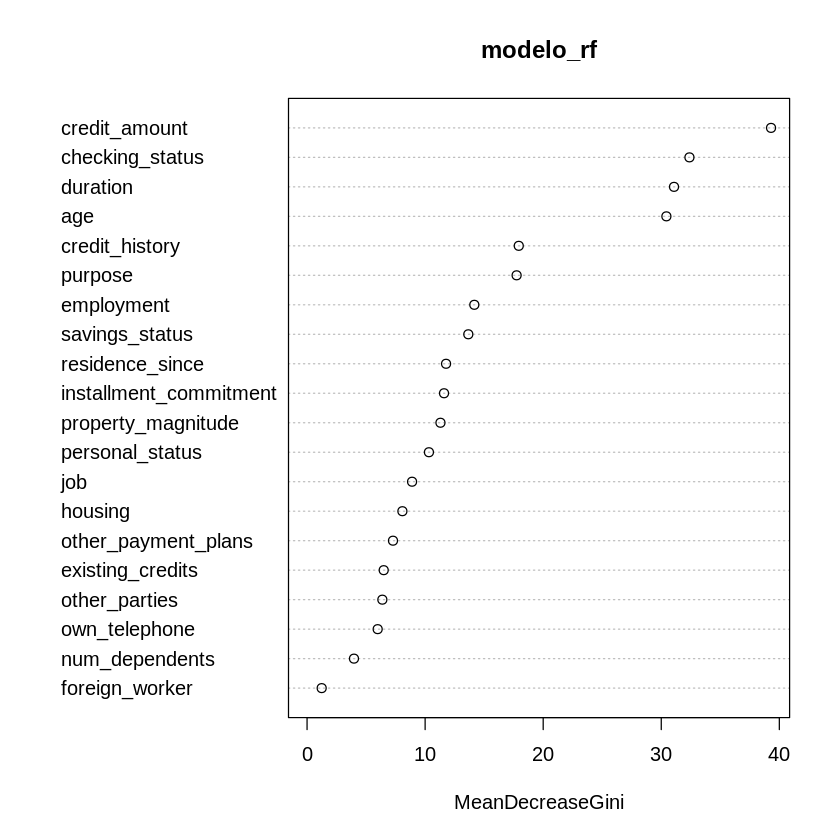

In [8]:
# plot com a importancia dos atributos
varImpPlot(modelo_rf)

Os 4 atributos mais importantes são:

- credit_amount
- checking_status
- duration
- age

In [9]:
# selecionando os 4 atributos mais importantes
atributos_importantes <- rownames(atributos)[order(atributos[, 1], decreasing = T)[1:4]]
formula_atributos <- as.formula(
  paste("class ~", paste(atributos_importantes, collapse = " + "))
)

In [10]:
# modelo com atributos selecionados
modelo_svm_selecionados <- svm(formula_atributos, data = X_train)

In [12]:
# previsoes e avaliacoes do modelo
y_pred_svm_selecionados <- predict(modelo_svm_selecionados, newdata = X_test)
matriz_svm_selecionados <- confusionMatrix(y_pred_svm_selecionados, X_test$class)

cat("Acurácia do modelo SVM com atributos selecionados: ", matriz_svm_selecionados$overall["Accuracy"])

Acurácia do modelo SVM com atributos selecionados:  0.72

Embora tenha ocorrido uma pequena queda na acurácia, a seleção de atributos simplificou o modelo, tornando-o mais interpretável e eficiente.